In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_csv(r"E:\Info_Srping\FWI_Prediction\Data\processed\filtered_data_NN.csv")
data

,Unnamed: 0,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,0,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,1,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,3,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,4,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,1183935,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1085124,1183936,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1085125,1183937,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1085126,1183938,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


In [32]:
data = data.drop(['Unnamed: 0','wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,12.0,7.6,74.4,12.0,1015.13,2.6,0,64.1,6.9,51.1,10.3,0.9,0.6,United Kingdom
1,11.1,1.7,52.0,22.1,1010.80,1.5,0,66.2,14.8,104.2,21.9,1.7,2.7,Canada
2,2.9,2.3,95.0,1.9,1018.19,0.0,2,44.3,3.1,330.1,6.1,0.1,0.0,Canada
3,22.1,11.1,49.8,9.5,1015.79,0.0,4,85.8,11.4,282.9,20.7,3.8,6.3,Canada
4,17.0,10.0,63.6,35.2,1016.70,0.0,1,86.6,107.4,482.9,138.1,15.6,47.7,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,22.5,15.4,63.0,35.2,1016.90,0.0,2,87.2,11.5,27.6,11.5,16.9,16.3,Canada
1085124,17.4,12.1,70.0,22.2,1018.30,0.0,10,84.5,20.6,334.2,35.6,6.1,12.8,Canada
1085125,21.0,15.0,68.7,13.0,1014.50,0.0,1,79.8,5.2,107.5,9.3,2.1,1.8,Canada
1085126,16.2,-1.4,31.0,25.9,1016.50,0.0,3,89.8,12.1,21.5,12.0,15.3,15.4,Canada


In [26]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'country'],
      dtype='object')

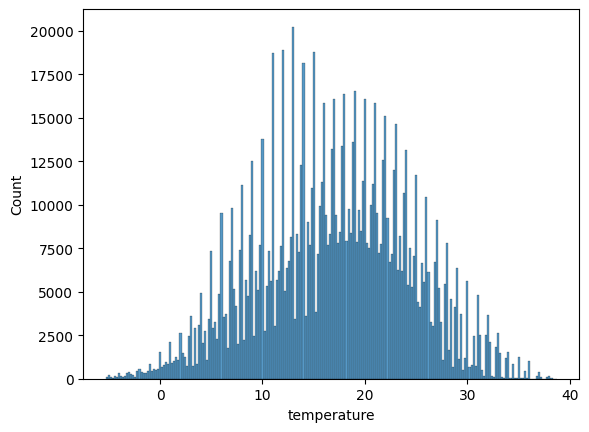

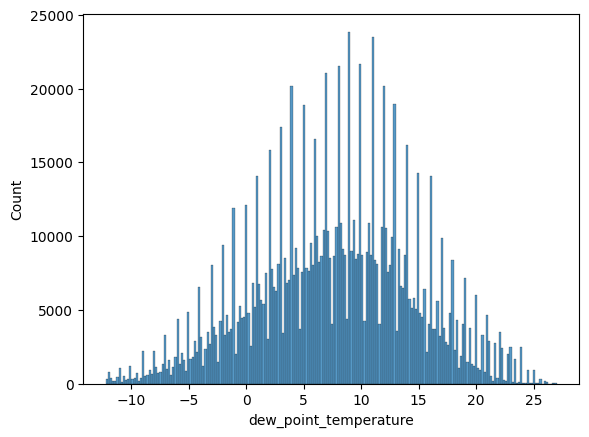

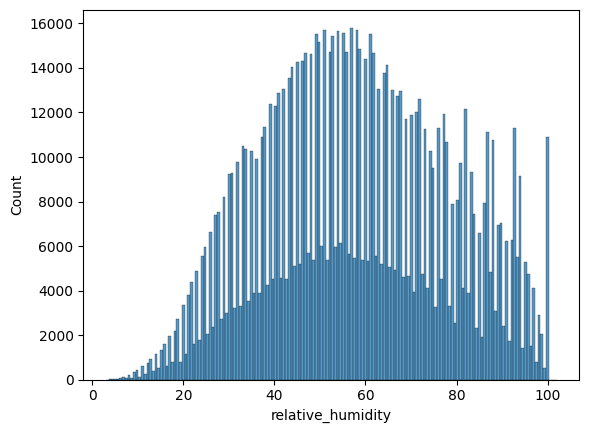

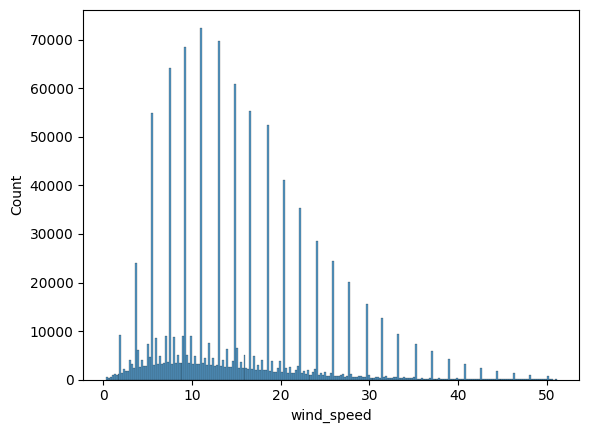

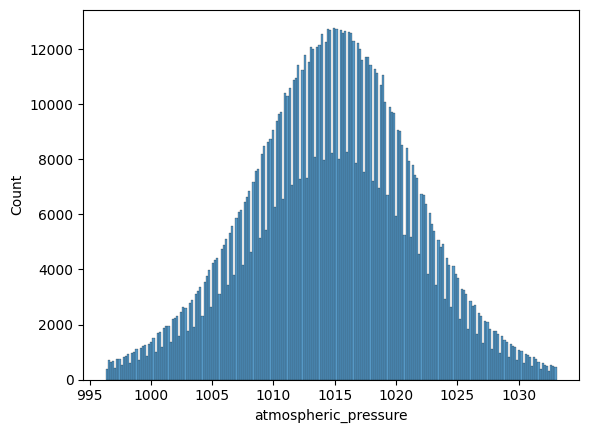

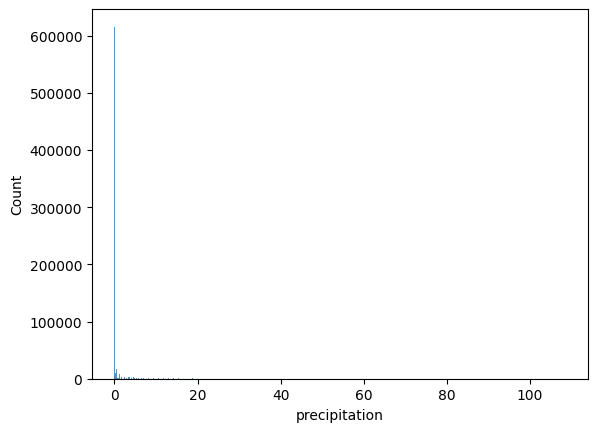

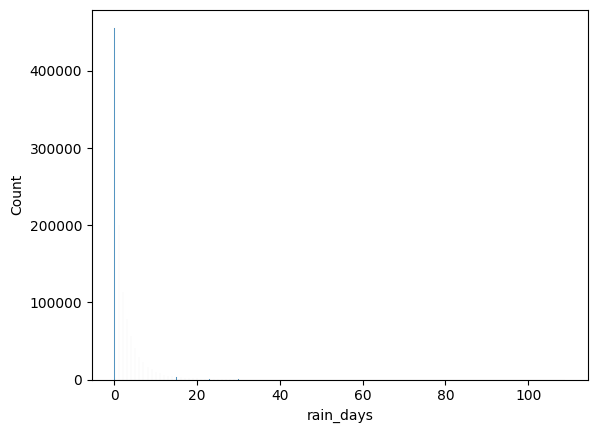

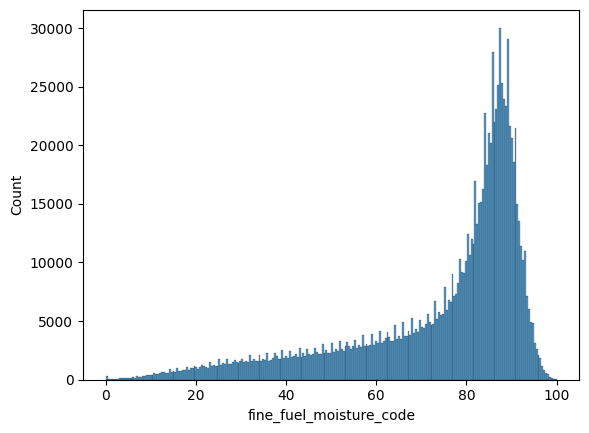

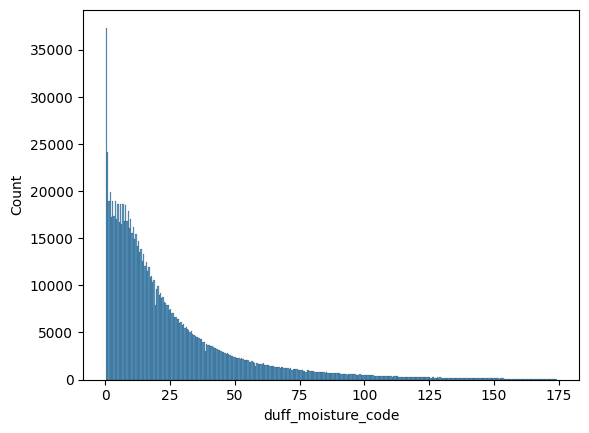

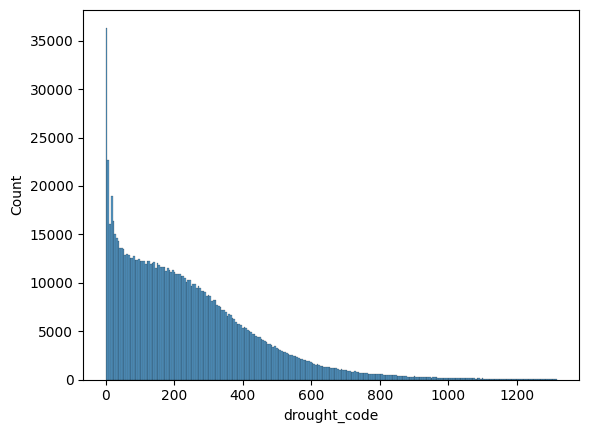

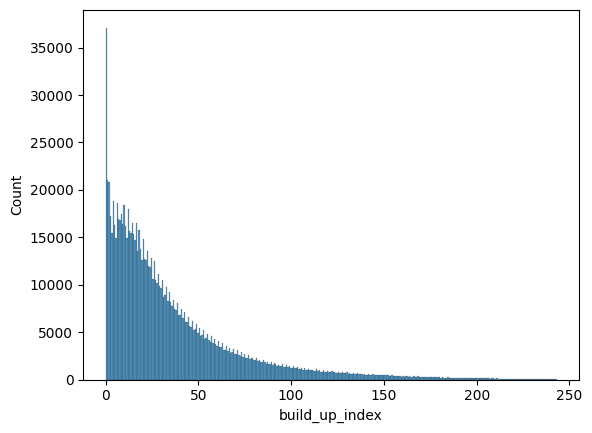

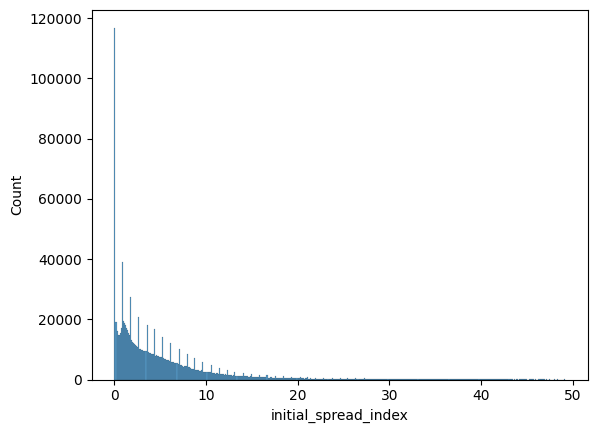

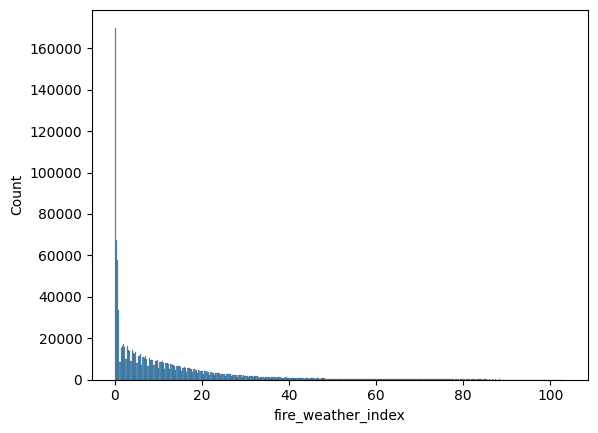

In [11]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [33]:
non_nd_col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']

In [34]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
lambda_values = {}

for col in non_nd_col:
    transformed = pt.fit_transform(data[col].values.reshape(-1, 1))
    data[col + '_transformed'] = transformed.flatten()
    lambda_values[col] = pt.lambdas_[0]

for col, lam in lambda_values.items():
    print(f"Column: {col}, Lambda: {lam}")


Column: fine_fuel_moisture_code, Lambda: 2.93880310051659
Column: duff_moisture_code, Lambda: 0.12621623965786885
Column: drought_code, Lambda: 0.39446497331245184
Column: build_up_index, Lambda: 0.18898082908650976
Column: initial_spread_index, Lambda: -0.08023120652595765
Column: fire_weather_index, Lambda: -5.747721166122341e-06
Column: wind_speed, Lambda: 0.2726404716678763


In [35]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,12.0,7.6,74.4,12.0,1015.13,2.6,0,64.1,6.9,51.1,...,0.9,0.6,United Kingdom,72708.454009,2.361511,9.521494,3.075923,0.625607,0.470003,3.713175
1,11.1,1.7,52.0,22.1,1010.80,1.5,0,66.2,14.8,104.2,...,1.7,2.7,Canada,79818.974666,3.301790,13.372567,4.270818,0.954706,1.308328,4.965638
2,2.9,2.3,95.0,1.9,1018.19,0.0,2,44.3,3.1,330.1,...,0.1,0.0,Canada,25047.831994,1.544431,22.469939,2.372427,0.094947,-0.000000,1.235349
3,22.1,11.1,49.8,9.5,1015.79,0.0,4,85.8,11.4,282.9,...,3.8,6.3,Canada,169338.776154,2.963691,20.998033,4.174044,1.473923,1.987863,3.295660
4,17.0,10.0,63.6,35.2,1016.70,0.0,1,86.6,107.4,482.9,...,15.6,47.7,United States,173966.550101,6.390347,26.507395,8.155600,2.515287,3.885636,6.090523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,22.5,15.4,63.0,35.2,1016.90,0.0,2,87.2,11.5,27.6,...,16.9,16.3,Canada,177491.593298,2.974733,6.981414,3.237048,2.575288,2.850683,6.090523
1085124,17.4,12.1,70.0,22.2,1018.30,0.0,10,84.5,20.6,334.2,...,6.1,12.8,Canada,161993.133576,3.753638,22.591625,5.156868,1.813743,2.624649,4.975812
1085125,21.0,15.0,68.7,13.0,1014.50,0.0,1,79.8,5.2,107.5,...,2.1,1.8,Canada,137193.916602,2.051735,13.567568,2.930678,1.081570,1.029616,3.863823
1085126,16.2,-1.4,31.0,25.9,1016.50,0.0,3,89.8,12.1,21.5,...,15.3,15.4,Canada,193311.419049,3.039411,6.122175,3.300496,2.500719,2.797259,5.331658


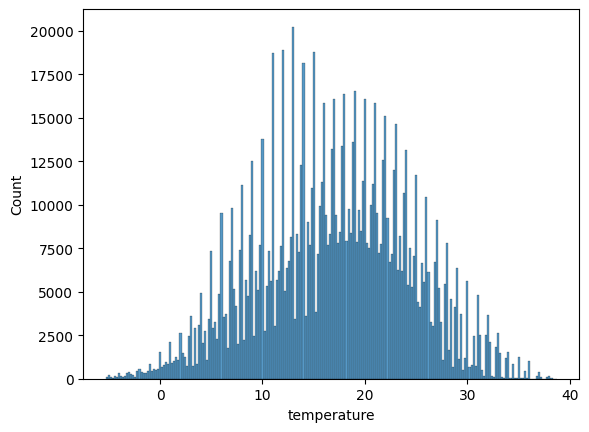

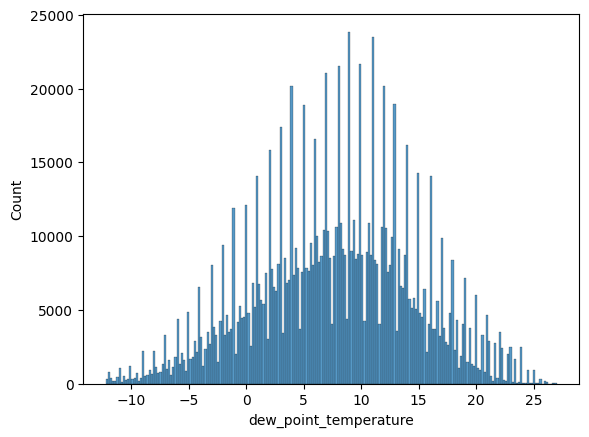

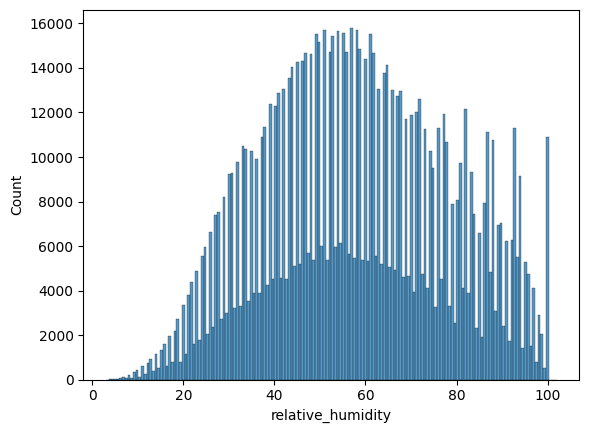

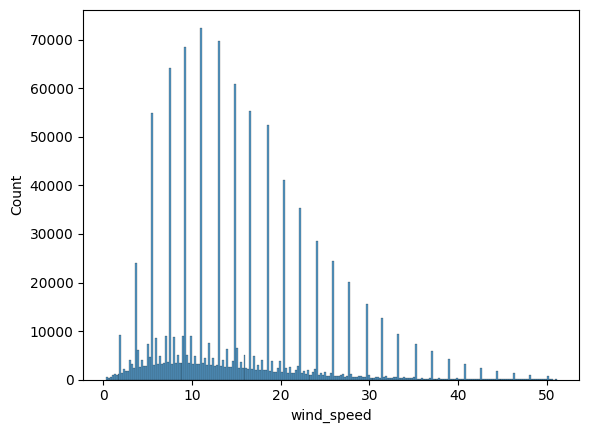

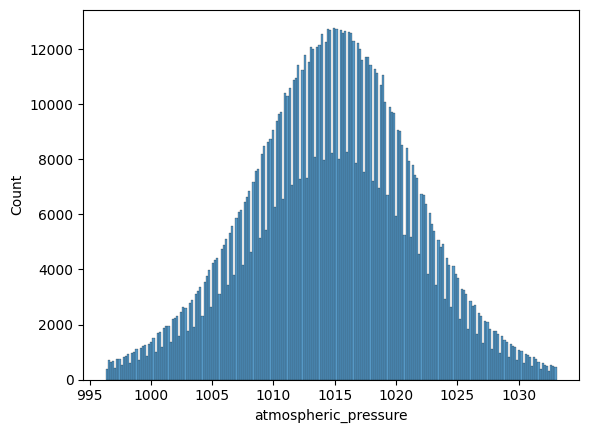

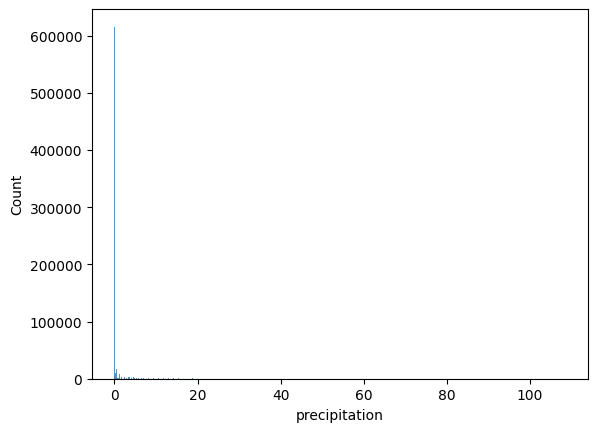

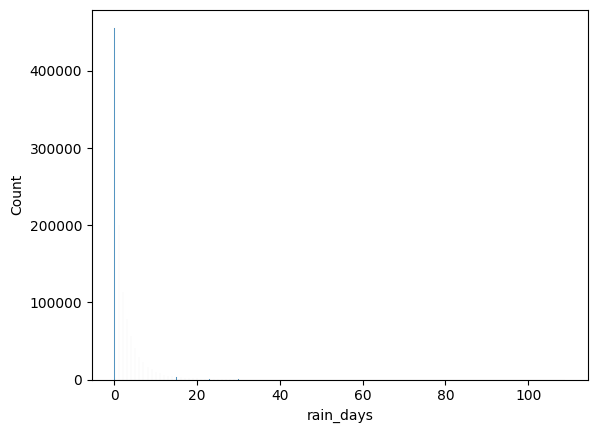

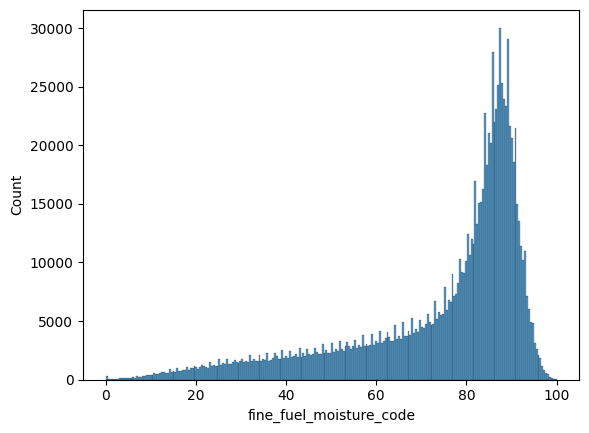

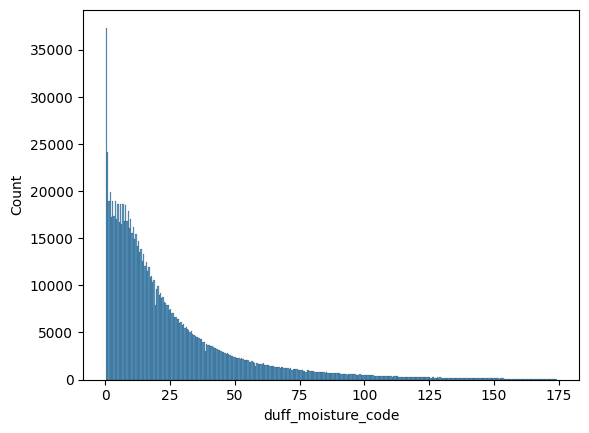

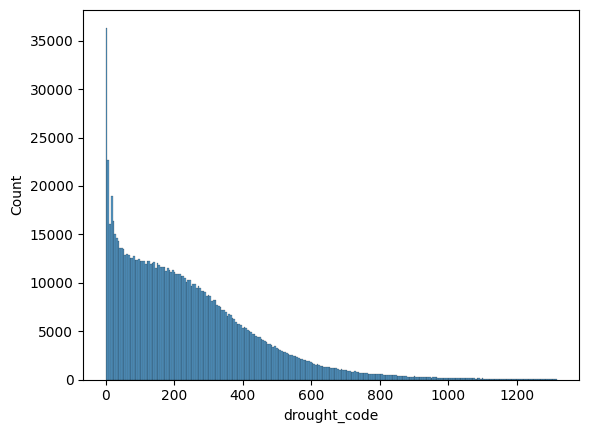

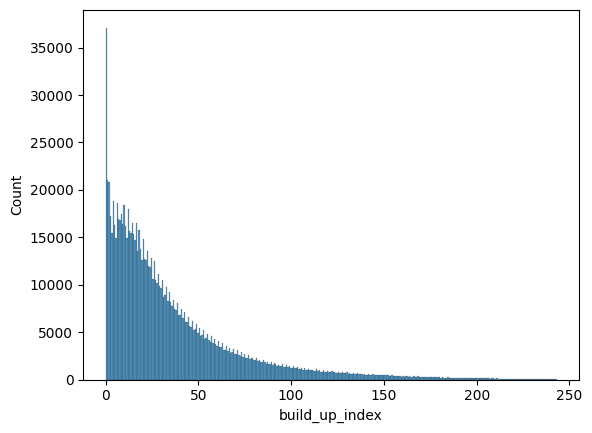

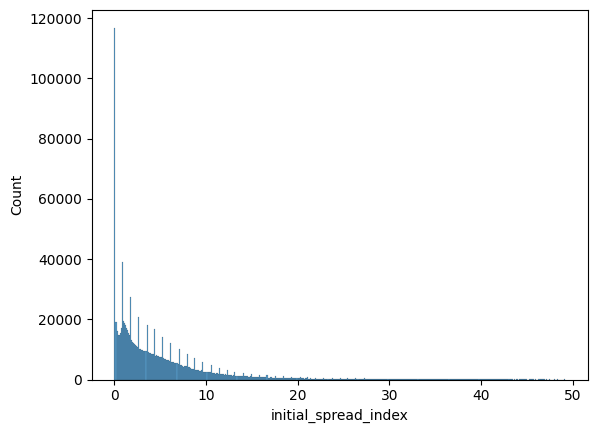

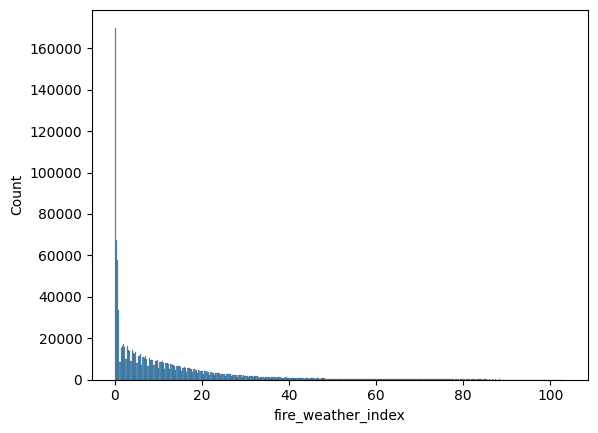

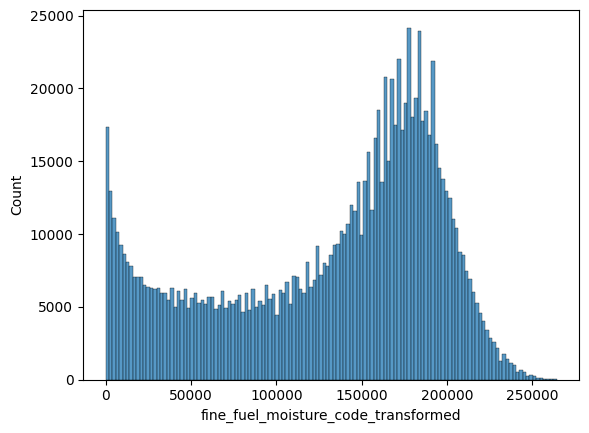

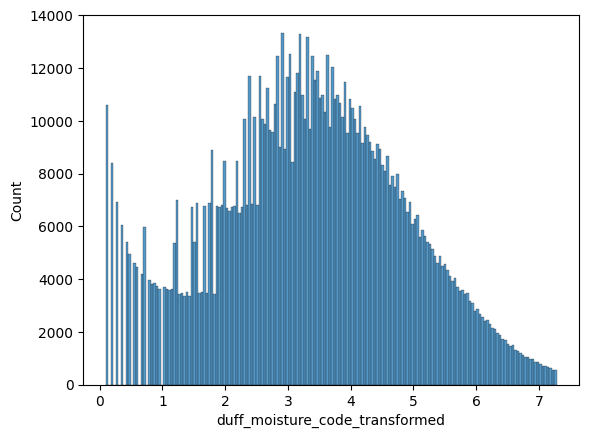

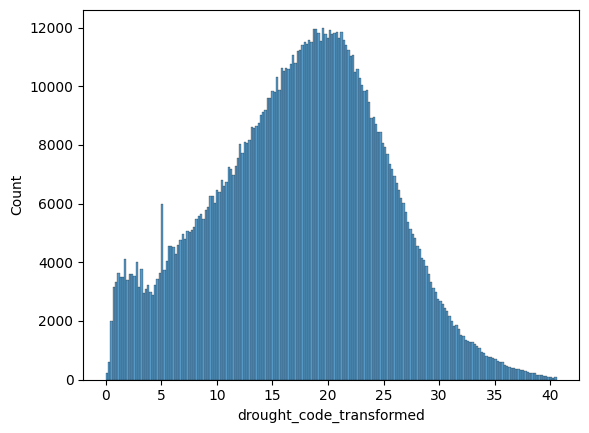

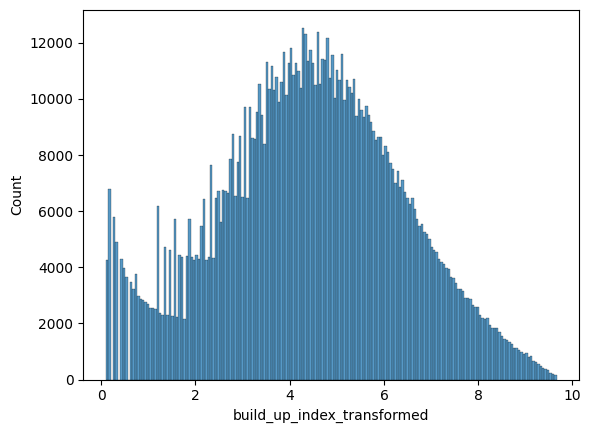

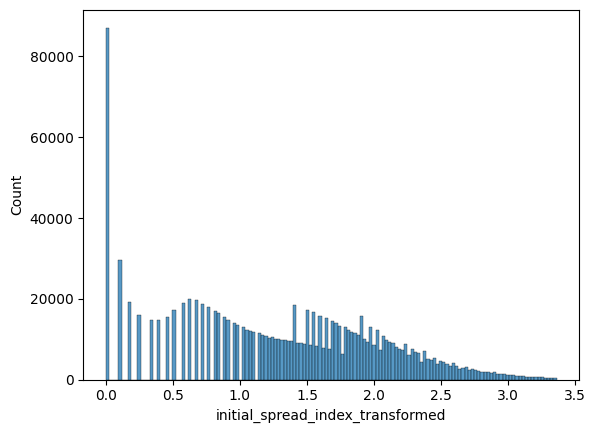

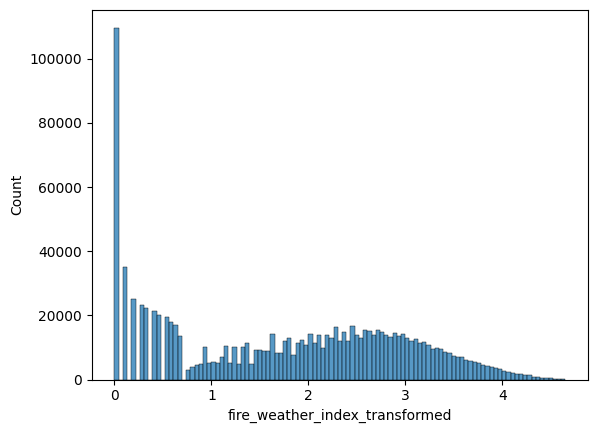

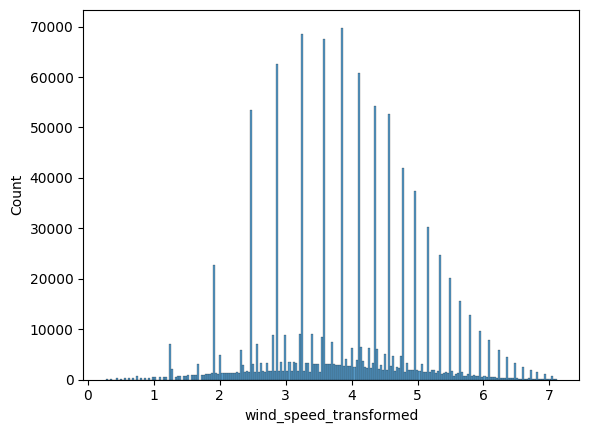

In [36]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [38]:
# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and std for each numeric column
mean_std_dict = {}

for col in num_cols:
    mean_std_dict[col] = {
        'mean': data[col].mean(),
        'std': data[col].std()
    }

mean_std_dict

{'temperature': {'mean': 17.00185314543539, 'std': 7.325943203403111},
 'dew_point_temperature': {'mean': 7.71469660722053, 'std': 6.932168406347393},
 'relative_humidity': {'mean': 58.24885930507733, 'std': 20.404855127672754},
 'wind_speed': {'mean': 15.032746275093814, 'std': 8.565676377856628},
 'atmospheric_pressure': {'mean': 1014.7450701576217,
  'std': 6.682679971332578},
 'precipitation': {'mean': 2.378919860145532, 'std': 6.4468113422846285},
 'rain_days': {'mean': 2.3422158491901417, 'std': 3.921647078936325},
 'fine_fuel_moisture_code': {'mean': 74.3166584034326,
  'std': 19.548715109214665},
 'duff_moisture_code': {'mean': 24.71474148671862, 'std': 26.923053037952915},
 'drought_code': {'mean': 237.4265026798681, 'std': 196.48472032200772},
 'build_up_index': {'mean': 36.20942128486226, 'std': 37.10916244829709},
 'initial_spread_index': {'mean': 4.990737959024189,
  'std': 5.9778193843816805},
 'fire_weather_index': {'mean': 10.382257116211171, 'std': 13.134108095260363},

In [43]:
scaler = StandardScaler()

for col in data.columns:
    if data[col].dtype != 'object':
        # Reshape the column to 2D array for scaler
        col_values = data[col].values.reshape(-1, 1)
        
        # Fit and transform
        scaled = scaler.fit_transform(col_values)
        
        # Flatten back to 1D and assign
        data[col] = scaled.flatten()


In [44]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-0.682759,-0.016546,0.791535,-0.354058,0.057601,0.034293,-0.597253,-0.522626,-0.661691,-0.948301,...,-0.684320,-0.744798,United Kingdom,-0.890585,-0.661914,-1.027182,-0.693202,-0.861460,-1.066900,-0.185346
1,-0.805610,-0.867650,-0.306244,0.825067,-0.590343,-0.136334,-0.597253,-0.415202,-0.368262,-0.678051,...,-0.550492,-0.584909,Canada,-0.781038,-0.043792,-0.523716,-0.082494,-0.441048,-0.379415,0.909257
2,-1.924921,-0.781097,1.801099,-1.533183,0.515501,-0.369007,-0.087263,-1.535481,-0.802834,0.471658,...,-0.818148,-0.790481,Canada,-1.624860,-1.199049,0.665620,-1.052757,-1.539361,-1.452336,-2.350865
3,0.695903,0.488347,-0.414061,-0.645921,0.156364,-0.369007,0.422727,0.587422,-0.494548,0.231435,...,-0.199193,-0.310814,Canada,0.598133,-0.266052,0.473192,-0.131954,0.222233,0.177852,-0.550236
4,-0.000253,0.329667,0.262249,2.354427,0.292537,-0.369007,-0.342258,0.628346,3.071171,1.249327,...,1.774772,2.841286,United States,0.669430,1.986572,1.193453,1.903010,1.552540,1.734159,1.892361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,0.750504,1.108644,0.232844,2.354427,0.322465,-0.369007,-0.087263,0.659038,-0.490834,-1.067903,...,1.992243,0.450563,Canada,0.723738,-0.258793,-1.359257,-0.610851,1.629189,0.885425,1.892361
1085124,0.054348,0.632602,0.575900,0.836742,0.531962,-0.369007,1.952697,0.520922,-0.152833,0.492525,...,0.185563,0.184081,Canada,0.484964,0.253246,0.681529,0.370365,0.656342,0.700061,0.918148
1085125,0.545752,1.050942,0.512189,-0.237313,-0.036672,-0.369007,-0.342258,0.280496,-0.724834,-0.661255,...,-0.483578,-0.653433,Canada,0.102899,-0.865556,-0.498223,-0.767436,-0.278983,-0.607978,-0.053685
1085126,-0.109454,-1.314841,-1.335411,1.268698,0.262609,-0.369007,0.167732,0.792039,-0.468548,-1.098949,...,1.724587,0.382039,Canada,0.967464,-0.216275,-1.471589,-0.578423,1.533930,0.841614,1.229143


In [46]:
df_sample = data.sample(n= 5000,random_state= 42 )
df_sample

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
67442,1.760613,-0.088673,-1.727475,-0.704293,-0.171349,-0.369007,2.462687,1.104080,3.754600,1.672770,...,1.741315,2.970720,Canada,1.594554,2.174623,1.438671,2.109599,1.540174,1.762297,-0.630655
532803,-0.723710,-0.867650,-0.404260,-1.101227,1.160453,-0.369007,0.167732,0.674384,-0.605977,-0.720802,...,-0.165736,-0.394565,United States,0.751162,-0.511927,-0.590875,-0.469476,0.268140,0.043915,-1.273863
1008657,-0.396107,0.546049,1.262011,1.058557,-0.210256,-0.244915,-0.597253,-0.537972,-0.583691,-0.747776,...,-0.550492,-0.653433,Canada,-0.905688,-0.457745,-0.635083,-0.435550,-0.441048,-0.607978,1.082021
555470,-0.573558,0.618177,1.805999,-1.556532,-1.775497,5.588980,-0.597253,-3.566306,-0.903120,-1.198193,...,-0.834876,-0.790481,Canada,-2.009932,-1.988375,-2.092190,-2.049920,-1.660652,-1.452336,-2.433543
414341,-2.047772,-1.401394,0.820939,-0.669270,-0.335954,-0.369007,4.247652,0.510691,3.524314,4.852153,...,-0.333021,0.496246,United States,0.467846,2.114088,2.814559,2.336074,0.015357,0.913384,-0.582062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742774,-1.979521,-1.228288,1.007170,0.486506,-0.005248,-0.218545,-0.597253,-0.420317,-0.847406,-0.535037,...,-0.583949,-0.744798,Canada,-0.786408,-1.465200,-0.320148,-1.346531,-0.532113,-1.066900,0.638275
722372,-0.068504,-0.160801,-0.311145,-0.470803,0.207242,-0.369007,3.227672,0.705077,-0.178833,0.196827,...,0.118649,0.115557,United Kingdom,0.806554,0.221394,0.443910,0.316836,0.592897,0.644755,-0.324594
333230,-0.669109,-1.386969,-1.041363,-1.077878,0.576854,-0.322473,-0.597253,0.664154,-0.100833,-0.414417,...,-0.182464,-0.150924,Canada,0.732860,0.314331,-0.167900,0.281791,0.245440,0.385192,-1.230041
458673,0.327350,0.675879,0.291653,-0.914434,1.061690,-0.362803,-0.342258,0.495344,-0.587405,-0.974766,...,-0.383206,-0.562068,Canada,0.442315,-0.466575,-1.091221,-0.578423,-0.074032,-0.315481,-0.946947


In [53]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed'],
      dtype='object')

In [54]:
New_data = data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [55]:
New_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-0.682759,-0.016546,0.791535,0.057601,0.034293,-0.597253,United Kingdom,-0.890585,-0.661914,-1.027182,-0.693202,-0.861460,-1.066900,-0.185346
1,-0.805610,-0.867650,-0.306244,-0.590343,-0.136334,-0.597253,Canada,-0.781038,-0.043792,-0.523716,-0.082494,-0.441048,-0.379415,0.909257
2,-1.924921,-0.781097,1.801099,0.515501,-0.369007,-0.087263,Canada,-1.624860,-1.199049,0.665620,-1.052757,-1.539361,-1.452336,-2.350865
3,0.695903,0.488347,-0.414061,0.156364,-0.369007,0.422727,Canada,0.598133,-0.266052,0.473192,-0.131954,0.222233,0.177852,-0.550236
4,-0.000253,0.329667,0.262249,0.292537,-0.369007,-0.342258,United States,0.669430,1.986572,1.193453,1.903010,1.552540,1.734159,1.892361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,0.750504,1.108644,0.232844,0.322465,-0.369007,-0.087263,Canada,0.723738,-0.258793,-1.359257,-0.610851,1.629189,0.885425,1.892361
1085124,0.054348,0.632602,0.575900,0.531962,-0.369007,1.952697,Canada,0.484964,0.253246,0.681529,0.370365,0.656342,0.700061,0.918148
1085125,0.545752,1.050942,0.512189,-0.036672,-0.369007,-0.342258,Canada,0.102899,-0.865556,-0.498223,-0.767436,-0.278983,-0.607978,-0.053685
1085126,-0.109454,-1.314841,-1.335411,0.262609,-0.369007,0.167732,Canada,0.967464,-0.216275,-1.471589,-0.578423,1.533930,0.841614,1.229143


In [57]:
New_data.to_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\standardized_data.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('your_dataset.csv')

# List your numeric columns or use all except object types
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col} (Original)')
    plt.show()
